In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyrealsense2 as rs

In [125]:
a = np.load(r'C:\Users\11kkh\Desktop\yolov5\depth_array.npy')
a 


array([[0.91418254, 0.91449504, 0.91532754, ..., 0.87451754, 0.87478004,
        0.87430004],
       [0.91561754, 0.91561754, 0.91647004, ..., 0.88588004, 0.88605504,
        0.88482004],
       [0.91464504, 0.91413754, 0.91559254, ..., 0.90162254, 0.90162254,
        0.90026004],
       ...,
       [0.97238255, 0.97224255, 0.97221255, ..., 0.96396255, 0.96385755,
        0.96386255],
       [0.97238005, 0.97225255, 0.97221255, ..., 0.96403755, 0.96393755,
        0.96393755],
       [0.97236755, 0.97224505, 0.97217005, ..., 0.96410755, 0.96400005,
        0.96399005]])

In [126]:
a.shape

(480, 640)

In [127]:
# ROI = (190~450 , 140~340)

In [128]:
depth_roi = a[140:340,190:450]
depth_roi , depth_roi.shape

(array([[0.97749255, 0.97748505, 0.97755005, ..., 0.97618505, 0.97627755,
         0.97623505],
        [0.97757255, 0.97756755, 0.97764005, ..., 0.97613505, 0.97622505,
         0.97618755],
        [0.97750755, 0.97751255, 0.97758755, ..., 0.97618005, 0.97625755,
         0.97620255],
        ...,
        [0.97253755, 0.97251005, 0.97249755, ..., 0.96965755, 0.96976505,
         0.96972255],
        [0.97247005, 0.97243755, 0.97241505, ..., 0.96958505, 0.96967255,
         0.96962755],
        [0.97238755, 0.97231755, 0.97228255, ..., 0.96954505, 0.96962255,
         0.96958255]]),
 (200, 260))

In [129]:
df = pd.DataFrame()
x_roi = 190 ; y_roi = 140

x = np.array([ list(range(depth_roi.shape[0])) for i in range(depth_roi.shape[1]) ]).ravel()
y = np.array([ list(range(depth_roi.shape[0])) for i in range(depth_roi.shape[1]) ]).T.ravel()
z = z = depth_roi.ravel()

df['x'] = x+x_roi
df['y'] = y+y_roi
df['z'] = z
df.head()

,x,y,z
0,190,140,0.977493
1,191,140,0.977485
2,192,140,0.977550
3,193,140,0.977483
4,194,140,0.977478


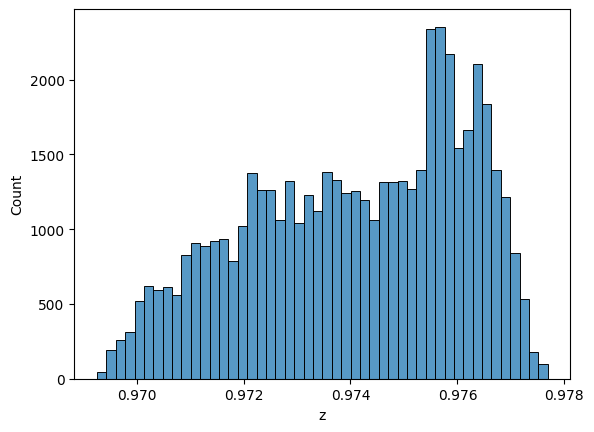

In [130]:
sns.histplot(data = df , x = 'z')
plt.show()

In [131]:
df['z'].describe()

count    52000.000000
mean         0.974094
std          0.002018
min          0.969260
25%          0.972473
50%          0.974344
75%          0.975805
max          0.977690
Name: z, dtype: float64

In [138]:
level = np.zeros(shape = (len(df),) , dtype = np.int8)
print(level.shape)
for i in df.index:
    if df.loc[i,'z'] < 0.972473:
        level[i] = 0
    elif df.loc[i,'z'] < 0.974344:
        level[i] = 1
    elif df.loc[i,'z'] < 0.975805:    
        level[i] = 2
    else:
        level[i] = 3
df['level'] = level
df.head()

(52000,)


,x,y,z,level
0,190,140,0.977493,3
1,191,140,0.977485,3
2,192,140,0.977550,3
3,193,140,0.977483,3
4,194,140,0.977478,3


In [141]:
df['level'].value_counts()

3    13027
0    13010
1    12990
2    12973
Name: level, dtype: int64

<Axes: xlabel='x', ylabel='y'>

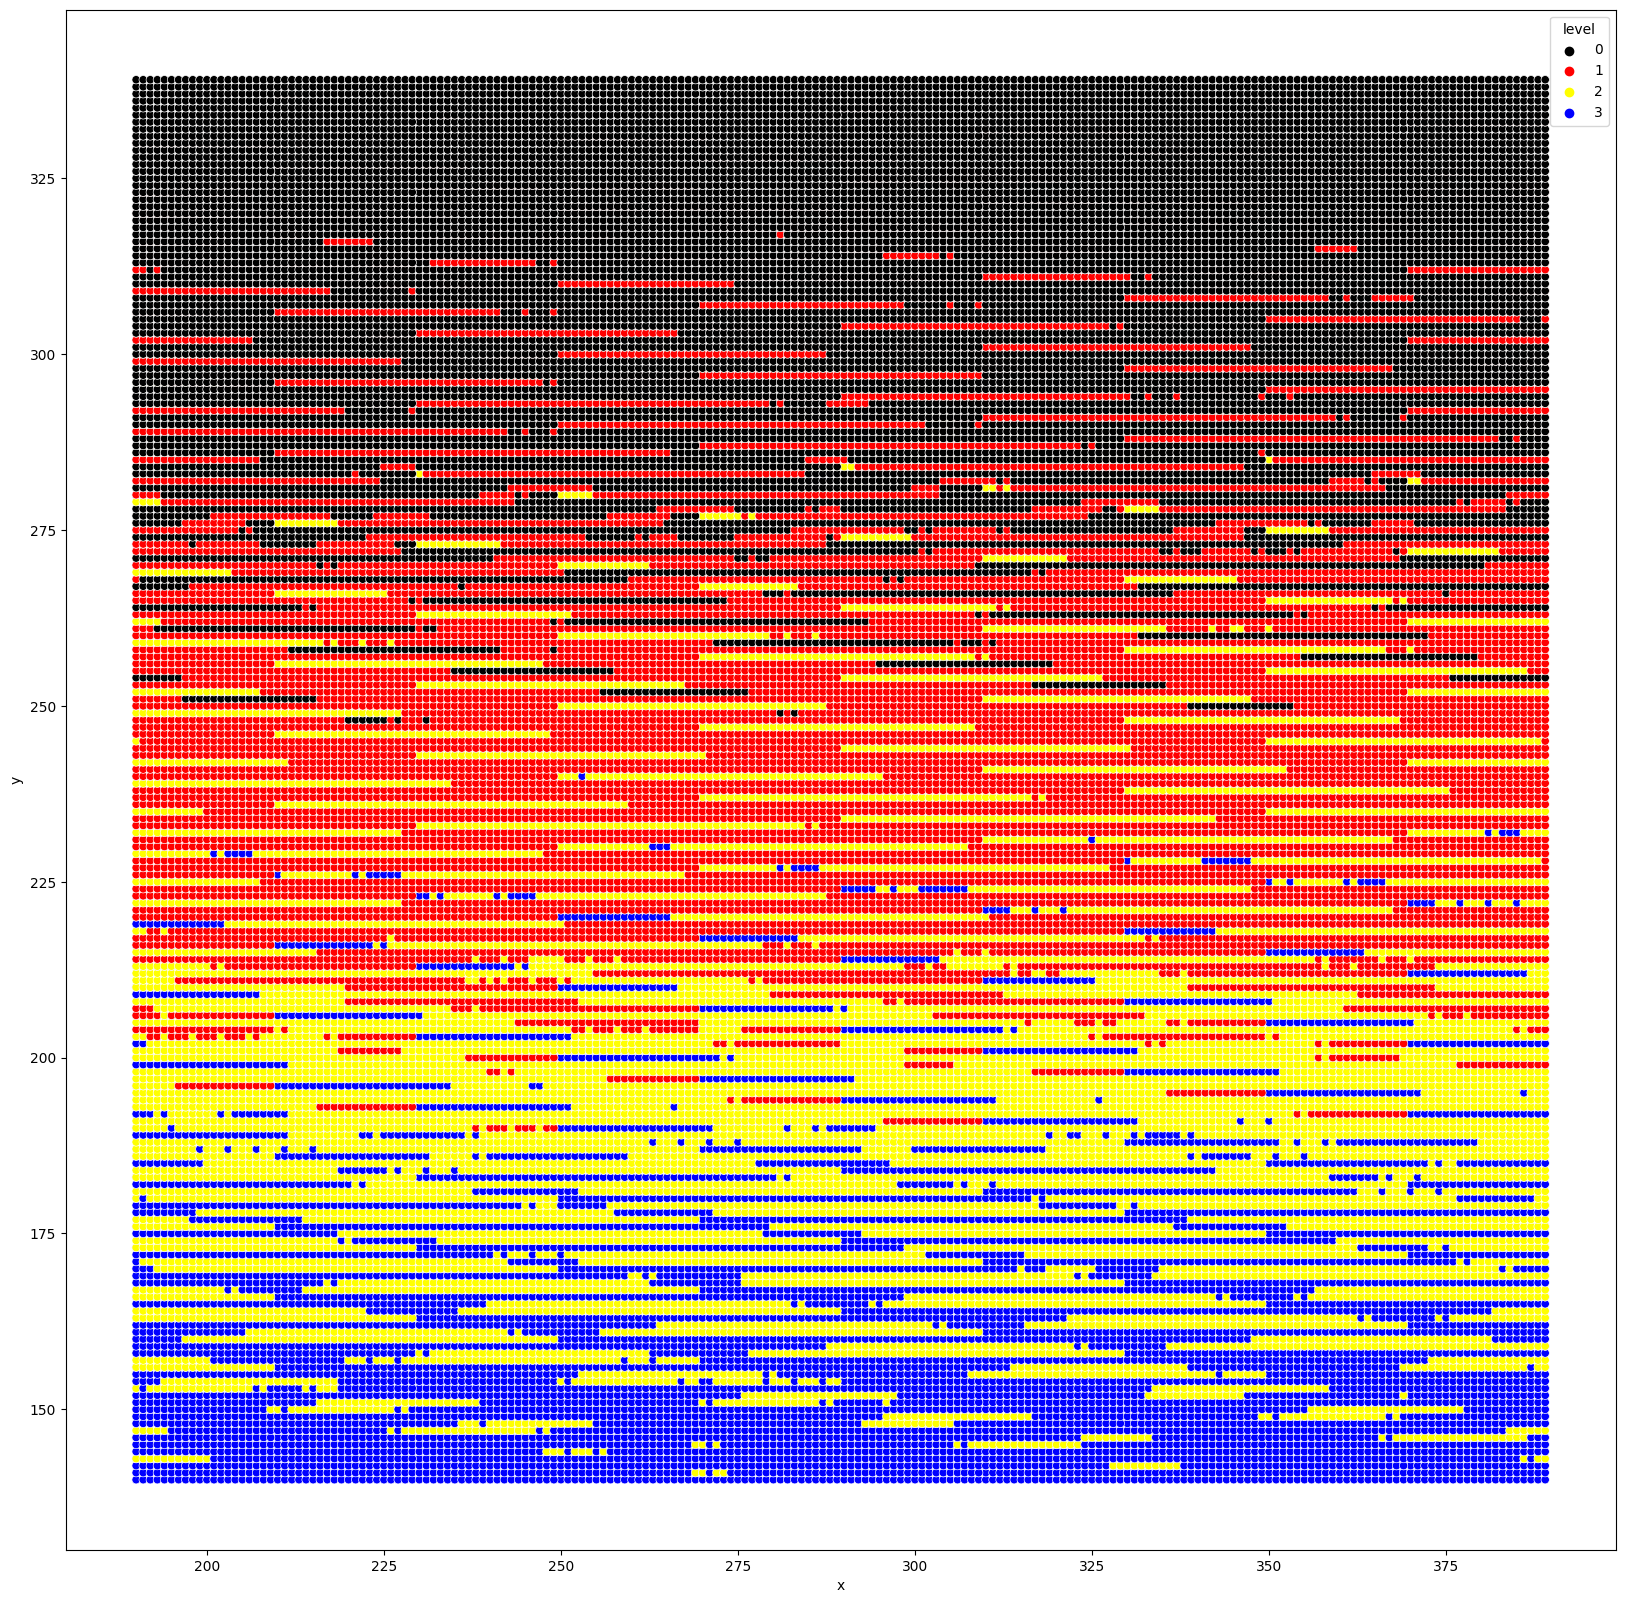

In [142]:
colors = ["#000000", "#ff0000", "#ffff00", "#0000FF"]
plt.figure(figsize=(20,20))
sns.scatterplot(data = df , x = 'x' , y = 'y' , hue = 'level' , palette= colors)

In [132]:
max_idx = df['z'].argmax()
max_value = df.iloc[max_idx,:]
min_idx = df['z'].argmin()
min_value = df.iloc[min_idx, :]
max_value , min_value

(x    260.00000
 y    141.00000
 z      0.97769
 Name: 270, dtype: float64,
 x    338.00000
 y    339.00000
 z      0.96926
 Name: 51948, dtype: float64)

In [144]:
max_value['z'] - min_value['z'] # 0.85cm 정도 차이발생

0.008430000400403537

## deprojection

### depth_intrin(align 모드에서는 depth_intrin는 color 카메라의 intrin과 동일하다)


In [ ]:
depth_intrin = aligned_depth_frame.profile.as_video_stream_profile().intrinsics

In [ ]:
xy_3Dpoint = rs.rs2_deproject_pixel_to_point(depth_intrin, [x, y], xy_depth)